# Generate orthogonal arrays with high D-efficiency

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903) by Eendebak, P. T. and Schoen, E. D.
This example shows how to generate orthogonal arrays with a high $D$-efficiency in a reasonable amount of time (< 1 minute). For more results and details, see the paper.

Generate a D-optimal orthogonal array of strength 2 with 32 runs and 7 factors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import oapackage

%matplotlib inline

In [2]:
run_size = 32
number_of_factors = 7
factor_levels = 2
strength = 2
nkeep = 24  # Number of designs to keep at each stage

arrayclass = oapackage.arraydata_t(factor_levels, run_size, strength, number_of_factors)
print(f"In this example we generate orthogonal arrays in the class: {arrayclass}")

In this example we generate orthogonal arrays in the class: arrayclass: N 32, k 7, strength 2, s {2,2,2,2,2,2,2}, order 0


First, generate orthogonal arrays with the function `extend_arraylist`. Next, keep the arrays with the best $D$-efficiency.

In [3]:
arraylist = [arrayclass.create_root()]

# %% Extend arrays and filter based on D-efficiency
options = oapackage.OAextend()
options.setAlgorithmAuto(arrayclass)

for extension_column in range(strength + 1, number_of_factors + 1):
    print("extend %d arrays with %d columns with a single column" % (len(arraylist), arraylist[0].n_columns))
    arraylist_extensions = oapackage.extend_arraylist(arraylist, arrayclass, options)

    # Select the best arrays based on the D-efficiency
    dd = np.array([a.Defficiency() for a in arraylist_extensions])
    ind = np.argsort(dd)[::-1][0:nkeep]
    selection = [arraylist_extensions[ii] for ii in ind]
    dd = dd[ind]
    print(
        "  generated %d arrays, selected %d arrays with D-efficiency %.4f to %.4f"
        % (len(arraylist_extensions), len(ind), dd.min(), dd.max())
    )

    arraylist = selection

extend 1 arrays with 2 columns with a single column
  generated 5 arrays, selected 5 arrays with D-efficiency 0.0000 to 1.0000
extend 5 arrays with 3 columns with a single column
  generated 19 arrays, selected 19 arrays with D-efficiency 0.0000 to 1.0000
extend 19 arrays with 4 columns with a single column


  generated 491 arrays, selected 24 arrays with D-efficiency 0.9183 to 1.0000
extend 24 arrays with 5 columns with a single column


  generated 2475 arrays, selected 24 arrays with D-efficiency 0.9196 to 1.0000
extend 24 arrays with 6 columns with a single column
  generated 94 arrays, selected 24 arrays with D-efficiency 0.7844 to 0.8360


Show the best array from the list of D-optimal orthogonal arrays.

In [4]:
selected_array = selection[0]
print(
    "Generated a design in OA(%d, %d, 2^%d) with D-efficiency %.4f"
    % (selected_array.n_rows, arrayclass.strength, selected_array.n_columns, dd[0])
)
print("The array is (in transposed form):\n")
selected_array.transposed().showarraycompact()

Generated a design in OA(32, 2, 2^7) with D-efficiency 0.8360
The array is (in transposed form):

00000000000000001111111111111111
00000000111111110000000011111111
00000111000111110001111100000111
00011001011001110110011100011001
00101010101010111010101100101010
01001011010110011101000101101001
01110010001101010111001010100011


We calculate the $D$-, $D_s$- and $D_1$-efficiencies.

In [5]:
efficiencies = np.array([array.Defficiencies() for array in arraylist])
print(efficiencies)

[[0.8360354  0.72763273 1.        ]
 [0.83481532 0.78995185 1.        ]
 [0.82829522 0.70849985 1.        ]
 [0.82829522 0.65037401 1.        ]
 [0.82545286 0.75411444 1.        ]
 [0.8185915  0.65157148 1.        ]
 [0.81676643 0.68965719 1.        ]
 [0.81559279 0.72218391 1.        ]
 [0.81557799 0.66966068 1.        ]
 [0.81302642 0.74299714 1.        ]
 [0.80973102 0.73354611 1.        ]
 [0.80286424 0.67455544 1.        ]
 [0.79907785 0.72697978 1.        ]
 [0.79762174 0.58515515 1.        ]
 [0.79514152 0.65199837 1.        ]
 [0.79348419 0.74167976 1.        ]
 [0.7928208  0.70038649 1.        ]
 [0.79225237 0.71961467 1.        ]
 [0.79171981 0.62994172 1.        ]
 [0.79160277 0.66978711 1.        ]
 [0.7883109  0.62733236 1.        ]
 [0.78683679 0.60799604 1.        ]
 [0.78477264 0.69310129 1.        ]
 [0.7843891  0.7533355  1.        ]]


Visualize the $D$-efficiencies using a scatter plot.

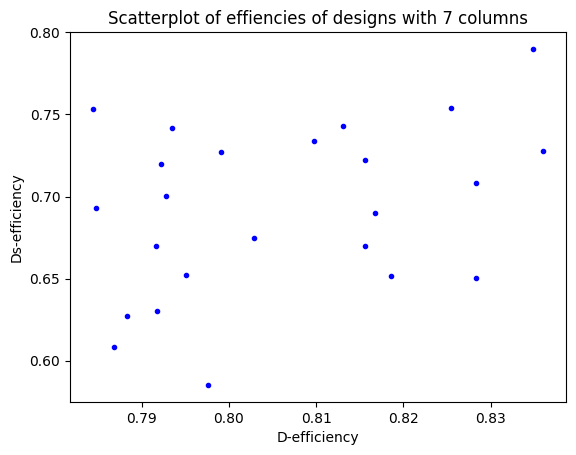

In [6]:
plt.plot(efficiencies[:, 0], efficiencies[:, 1], ".b")
plt.title("Scatterplot of effiencies of designs with %d columns" % arraylist[0].n_columns)
plt.xlabel("D-efficiency")
_ = plt.ylabel("Ds-efficiency")